
# TF-IDF

This notebook explains the TF-IDF method in Natural Language Processing (NLP), 

covering both mathematical foundations and practical implementation in Python.

The following sample text is taken from the book ***"Anne Shirley" (Anne Shirley of Green Gables).***

In [146]:
# a part "Rainbow Valley" of Anne sheirly
document1 ="""    
Mary Vance walked down the Valley with her head held high. She had on a new blue velvet cap with a scarlet rosette in it, a coat of navy blue
cloth and a little squirrel-fur muff. She was very conscious of her new clothes and very well pleased with herself. Her hair was elaborately
crimped, her face was quite plump, her cheeks rosy, her white eyes shining. She did not look much like the forlorn and ragged waif the
Merediths had found in the old Taylor barn. Una tried not to feel envious. Here was Mary with a new velvet cap, but she and Faith had to
wear their shabby old gray tams again this winter. Nobody ever thought of getting them new ones and they were afraid to ask their father for
them for fear that he might be short of money and then he would feel badly. Mary had told them once that ministers were always short of
money, and found it “awful hard” to make ends meet. Since then Faith and Una would have gone in rags rather than ask their father for
anything if they could help it. They did not worry a great deal over their shabbiness; but it was rather trying to see Mary Vance coming out
in such style and putting on such airs about it, too. The new squirrel muff was really the last straw. Neither Faith nor Una had ever had a
muff, counting themselves lucky if they could compass mittens without holes in them. Aunt Martha could not see to darn holes and though Una
tried to, she made sad cobbling. Somehow, they could not make their greeting of Mary very cordial. But Mary did not mind or notice that;
she was not overly sensitive. She vaulted lightly to a seat on the pine tree, and laid the offending muff on a bough. Una saw that it was lined
with shirred red satin and had red tassels. She looked down at her own rather purple, chapped, little hands and wondered if she would ever,
_ever_ be able to put them into a muff like that.
"""


## 1. History and Background

TF-IDF stands for **Term Frequency–Inverse Document Frequency**. It is a statistical measure used to evaluate how 

important a word is to a document in a collection or corpus. It is one of the most popular weighting schemes in information retrieval and text mining.

- Introduced by **Hans Peter Luhn** (1957) for automatic text summarization.
- Later formalized by **Gerard Salton** in the 1970s in the **SMART Information Retrieval System**.
- Widely used in traditional search engines, text mining, and NLP.

- **1950s-1960s**: The concept originates from information retrieval research
- **1972**: First formal mention by Karen Spärck Jones in her paper "A Statistical Interpretation of Term Specificity and Its Application in Retrieval"
- **1980s-1990s**: Became standard in search engines and document classification
- **Present**: Still widely used as a baseline in text processing and NLP tasks

**Core Idea**:  
Words that occur frequently in a document are important (TF), but if they appear in many documents, they're less informative (IDF).


## Visualize Text Frequency

One useful way to visually the frequency of words in a text is to use a `word cloud` diagram. Two examples are shown below.

In [147]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


def plot_wordcloud(wordcloud, title=''):
    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


def create_wordcloud(text: str, max_words: int = 200, background_color: str = "white"):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text: The input text string.
        max_words: The maximum number of words to display in the cloud.
        background_color: The background color for the word cloud image.
    """
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color=background_color, max_words=max_words,
                          contour_width=3, contour_color='steelblue')

    # Generate the word cloud from the text
    wordcloud.generate(text)

    return wordcloud

def create_wordcloud_from_frequencies(frequencies: dict, max_words: int = 200, background_color: str = "white"):
    """
    Generates and displays a word cloud from a dictionary of word frequencies.

    Args:
        frequencies: A dictionary where keys are words and values are their frequencies.
        max_words: The maximum number of words to display in the cloud.
        background_color: The background color for the word cloud image.
    """
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color=background_color,
        max_words=max_words,
        contour_width=3,
        contour_color='steelblue'
    )

    # Generate the word cloud from the frequency dictionary
    wordcloud.generate_from_frequencies(frequencies)

    return wordcloud


***Creating a word cloud directly from text***

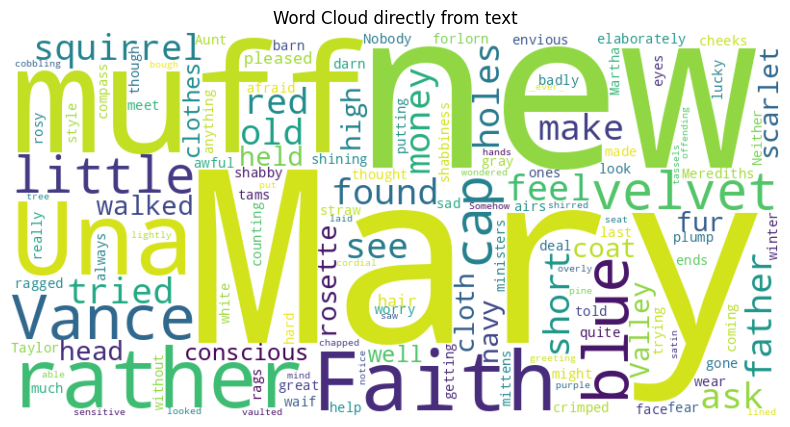

In [148]:
# Example 1: Creating a word cloud directly from text ---
wordcloud = create_wordcloud(document1)
plot_wordcloud(wordcloud,title = "Word Cloud directly from text")

***Creating a word cloud from pre-calculated frequencies***

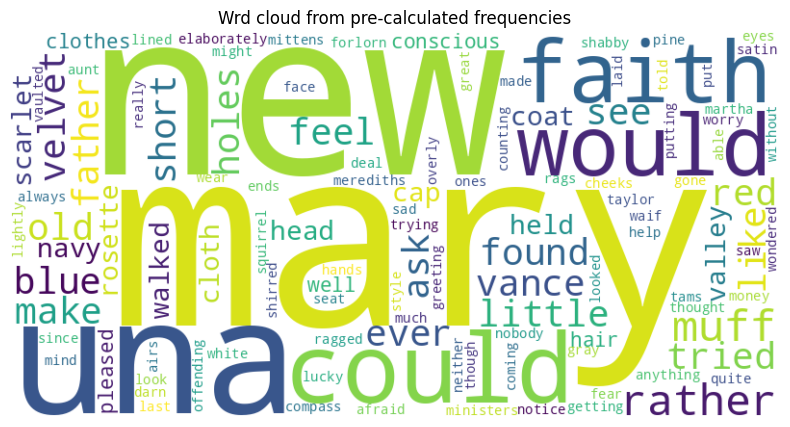

In [149]:

# Example 2: Creating a word cloud from pre-calculated frequencies ---
from nltk.corpus import stopwords
# Manual tokenization based on blank space.
tokens = document1.lower().split()

stop_words = set(stopwords.words('english'))

filtered_tokens = [w for w in tokens if not w in stop_words and w.isalnum()]

word_counts = Counter(filtered_tokens)

wordcloud = create_wordcloud_from_frequencies(word_counts)

plot_wordcloud(wordcloud, title="Wrd cloud from pre-calculated frequencies")

In the two graphs above, words like `mary` and `new` are repeated more than the others and carry more information. 

Of course, if the stop words are not removed, the results will be similar.

The below graph plots word cloud without stopword removal on same document

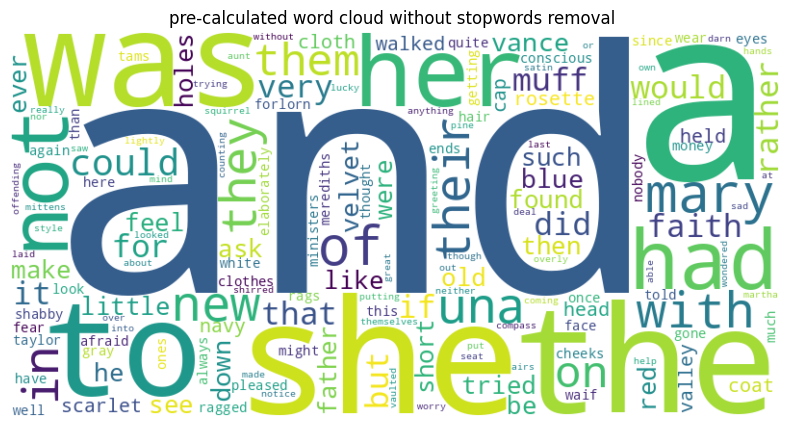

In [150]:
# Example 2: Creating a word cloud from pre-calculated frequencies ---

filtered_tokens = [w for w in tokens if w.isalnum()]

word_counts = Counter(filtered_tokens)

wordcloud = create_wordcloud_from_frequencies(word_counts)
plot_wordcloud(wordcloud,title="pre-calculated word cloud without stopwords removal ")

As can be seen, words like `a`, `was`, `and`, etc., which do not have much information value, have a higher frequency.

## 2. Mathematical Foundations

TF-IDF is composed of two components, `Term Frequency (TF)` that measures how frequently a term occurs in a document:

### $ tf(t,d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} $

<div style="color:red">It says what is the probability that a word will be present in the document d?</div>


In [151]:

def compute_tf(text: str):
    """Compute Term Frequency for a single document"""
    tf_dict = {}
    words = text.lower().split()
    word_count = len(words)

    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1/ word_count

    return tf_dict


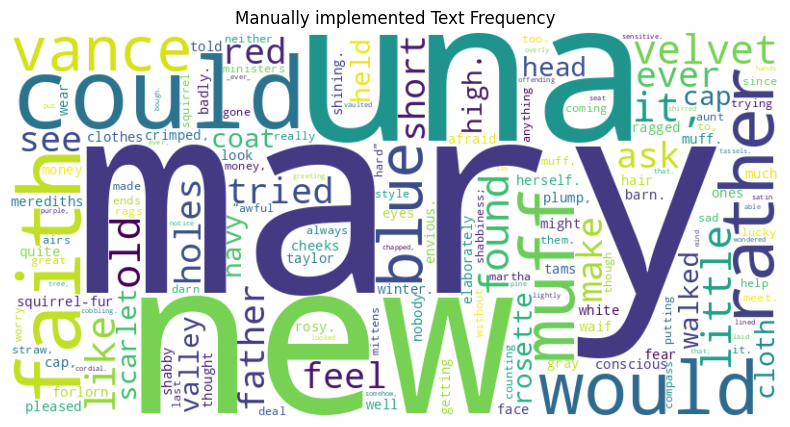

In [152]:
tf = compute_tf(document1)

filtered_dict = {word: frequency for word, frequency in tf.items() if word not in stop_words}

wordcloud = create_wordcloud_from_frequencies(filtered_dict)
plot_wordcloud(wordcloud,title='Manually implemented Text Frequency')


### Inverse Document Frequency (IDF)
Measures how important a term is across the entire corpus:

### $ idf(t,D) = \log\left(\frac{\text{Total number of documents in corpus D}}{\text{Number of documents containing term t}}\right) $

- here if we have only one document, the result returns $0 = \log\left(\frac{1}{1}\right) $, secound coument to test placed in the next cell


<strong>this is the basis for defining the TF-IDF concept.</strong>

In [153]:
document2 = """
After Davy had gone to bed Anne wandered down to Victoria Island and sat there alone, curtained with fine-spun, moonlit gloom, while the
water laughed around her in a duet of brook and wind. Anne had always loved that brook. Many a dream had she spun over its sparkling water in
days gone by. She forgot lovelorn youths, and the cayenne speeches of malicious neighbors, and all the problems of her girlish existence. In
imagination she sailed over storied seas that wash the distant shining shores of “faery lands forlorn,” where lost Atlantis and Elysium lie,
with the evening star for pilot, to the land of Heart’s Desire. And she was richer in those dreams than in realities; for things seen pass
away, but the things that are unseen are eternal.
"""

In [154]:
from collections import defaultdict
import math

def compute_idf(docs):
    """Compute Inverse Document Frequency for all documents"""
    idf_dict = defaultdict(lambda: 0)
    total_docs = len(docs)

    # Count the number of documents containing each word
    for doc in docs:
        words_in_doc = set(doc.lower().split())  # Unique words in the current document
        for word in words_in_doc:
            idf_dict[word] += 1

    # Calculate IDF for each word
    for word, doc_count in idf_dict.items():
        idf_dict[word] = math.log(total_docs / doc_count)

    return idf_dict

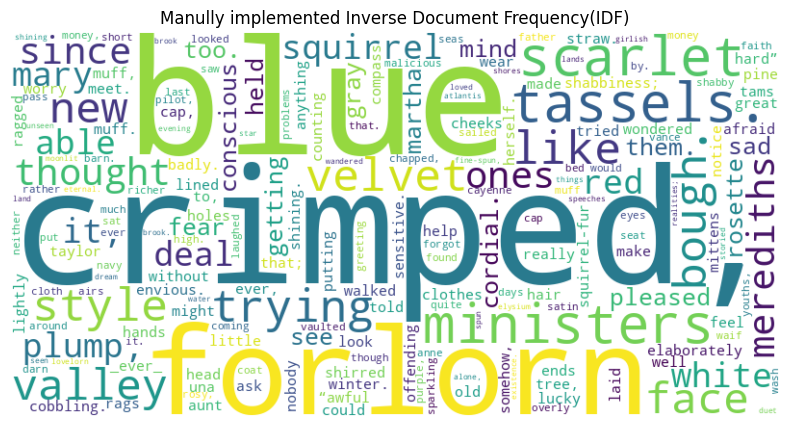

In [155]:
idf = compute_idf([document1,  document2])

filtered_dict = {word: frequency for word, frequency in idf.items() if word not in stop_words}
   
wordcloud = create_wordcloud_from_frequencies(filtered_dict)
plot_wordcloud(wordcloud, title='Manully implemented Inverse Document Frequency(IDF)')

## Clarify IDF


IDF is used to **penalize common words** that appear in **many documents** and highlight **unique or rare words**. 

Words like **"the"**, **"is"**, and **"and"** appear in almost every document — they aren’t useful for distinguishing 

between texts. IDF **reduces the importance** of such common words. On the other hand, a rare word like **"photosynthesis"** 

might appear only in a few documents. That word is **highly informative** and should be given more weight.

### $\text{IDF}(t, D) = \log \left( \frac{N}{1 + df_t} \right)$

Where:

* $t$ is the term (word)
* $D$ is the corpus (all documents)
* $N$ is the **total number of documents**
* $df_t$ is the number of documents **containing term $t$**

We add 1 to the denominator to avoid division by zero.



## Example

Imagine a corpus of 5 documents:

```
Doc1: "I love machine learning"
Doc2: "Machine learning is fun"
Doc3: "Deep learning and AI too"
Doc4: "AI and robotics very interesting"
Doc5: "Learning is continuous"
```

Let’s compute IDF for a few terms:

### Term: "learning"

* Appears in **4 documents**: Doc1, Doc2, Doc3, Doc5
* So: $\text{IDF}(\text{"learning"}) = \log\left( \frac{5}{1 + 4} \right) = \log(1) = 0$

**Very common**, so **low IDF** (not informative).

### Term: "robotics"

* Appears in **1 document**: Doc4
* So: $ \text{IDF}(\text{"robotics"}) = \log\left( \frac{5}{1 + 1} \right) = \log(2.5) \approx 0.3979 $

**Rare**, so **higher IDF** (more informative).

## Intuition Recap

* **Common word** → Appears in many docs → **Low IDF**
* **Rare word** → Appears in few docs → **High IDF**

TF-IDF combines this with term frequency to give a **balanced score**.

### TF-IDF $(t,d,D) = tf(t,d) \times idf(t,D) $

Note: Variations exist for both TF and IDF calculations (logarithmic, augmented, etc.)

In [156]:
def compute_tfidf(docs):
    """Compute TF-IDF for all documents"""
    tfidf = []
    idf = compute_idf(docs)
    
    for doc in docs:
        tf = compute_tf(doc)
        doc_tfidf = {}
        
        for word in tf:
            doc_tfidf[word] = tf[word] * idf[word]
        
        tfidf.append(doc_tfidf)
    
    return tfidf

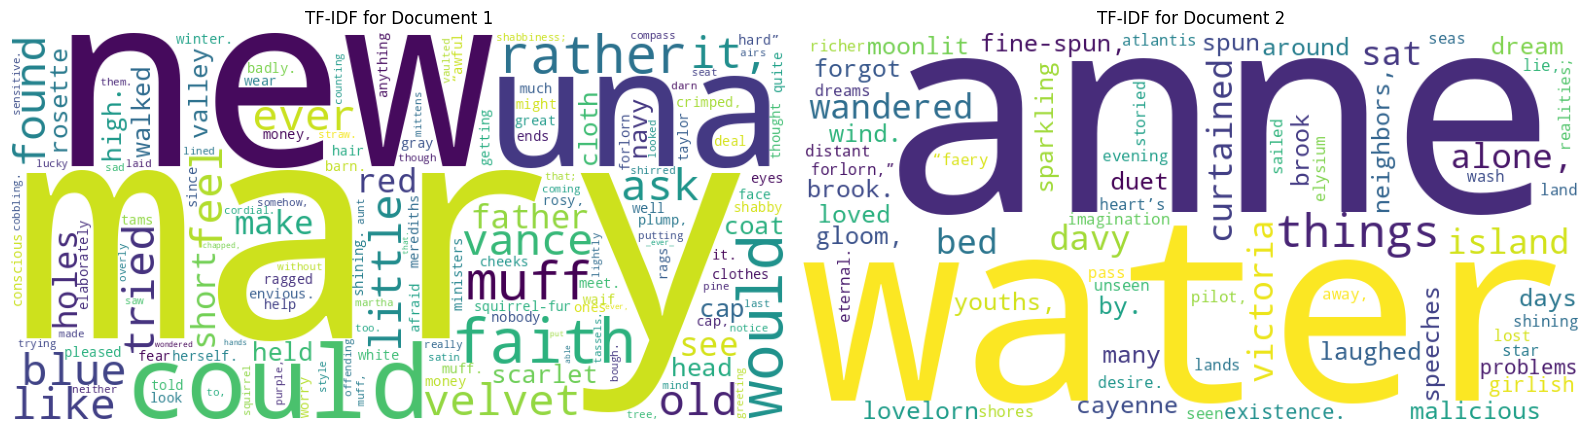

In [ ]:
# Compute TF-IDF using our implementation
tfidf = compute_tfidf([document1, document2])

result_dict = {index: doc_tfidf for index, doc_tfidf in enumerate(tfidf)}
dict1 = tfidf[0]

filtered_dict1 = {word: frequency for word, frequency in dict1.items() if word not in stop_words}
wordcloud1 = create_wordcloud_from_frequencies(filtered_dict1)

dict2 = tfidf[1]

filtered_dict2 = {word: frequency for word, frequency in dict2.items() if word not in stop_words}
wordcloud2 = create_wordcloud_from_frequencies(filtered_dict2)


# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Adjust figsize for better viewing

# Plot the first word cloud
axes[0].imshow(wordcloud1.to_array())  # Use .to_array()
axes[0].set_title("TF-IDF for Document 1")
axes[0].axis("off")

# Plot the second word cloud
axes[1].imshow(wordcloud2.to_array())  # Use .to_array()
axes[1].set_title("TF-IDF for Document 2")
axes[1].axis("off")

plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()

***sklearn TfidfVectorizer***

In [161]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")

# Fit and transform the corpus
X = vectorizer.fit_transform([document1, document2])
# Convert to DataFrame for readability
df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names_out())

total_sum = df.values.sum()
print("Total TF-IDF sum:", total_sum)

l2_norm = np.linalg.norm(df.values)
print("L2 norm:", l2_norm)
df


Total TF-IDF sum: 18.71871064936409
L2 norm: 1.414213562373094


,_ever_,a,able,about,afraid,after,again,airs,all,alone,...,while,white,wind,winter,with,without,wondered,worry,would,youths
0,0.031799,0.226250,0.031799,0.031799,0.031799,0.000000,0.031799,0.031799,0.000000,0.000000,...,0.000000,0.031799,0.000000,0.031799,0.113125,0.031799,0.031799,0.031799,0.095396,0.000000
1,0.000000,0.101695,0.000000,0.000000,0.000000,0.071464,0.000000,0.000000,0.071464,0.071464,...,0.071464,0.000000,0.071464,0.000000,0.101695,0.000000,0.000000,0.000000,0.000000,0.071464


In [165]:
# Compute TF-IDF using our implementation
tfidf = compute_tfidf([document1, document2])

df = pd.DataFrame(tfidf)
df.fillna(0,inplace=True)
df = df[sorted(df.columns)] 


total_sum = df.values.sum()
print("Total TF-IDF sum:", total_sum)

l2_norm = np.linalg.norm(df.values)
print("L2 norm:", l2_norm)
df

df

Total TF-IDF sum: 0.9086555147974735
L2 norm: 0.06671694591155676


,_ever_,a,able,about,afraid,after,again,airs,all,"alone,",...,wind.,winter.,with,without,wondered,worry,would,"youths,",“awful,“faery
0,0.001953,0.0,0.001953,0.001953,0.001953,0.000000,0.001953,0.001953,0.000000,0.000000,...,0.000000,0.001953,0.0,0.001953,0.001953,0.001953,0.005858,0.000000,0.001953,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.005291,0.000000,0.000000,0.005291,0.005291,...,0.005291,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005291,0.000000,0.005291


**detailed analysis of the differences** between our implementation and sklearn method and **why they produce different TF-IDF results**.


## Summary of Each Code

| Feature                     | Code 1 (Manual)                                 | Code 2 (Scikit-learn)                                       |
| --------------------------- | ----------------------------------------------- | ----------------------------------------------------------- |
| **Library**                 | Custom functions using `math.log` and `split()` | `sklearn.feature_extraction.text.TfidfVectorizer`           |
| **TF calculation**          | Raw frequency divided by total words            | Normalized term frequency (l2-norm by default)              |
| **IDF calculation**         | `log(N / df)`                                   | `log(1 + (N / (1 + df))) + 1` (*by default*)                |
| **Preprocessing**           | Lowercased and split by spaces                  | Uses a regex-based tokenizer with optional stopword removal |
| **Handling of punctuation** | Punctuation is kept if part of the word         | Stripped by default using `token_pattern`                   |
| **Stopwords removal**       | No stopword filtering                           | Optional in `TfidfVectorizer` (not enabled here)            |
| **Normalization**           | No normalization                                | Uses **L2 normalization** by default                        |


## Key Differences Explained

### 1. **IDF Formula Difference**

* **Our Code** (Code 1):

$idf(word) = log(\frac{N}{df})$


  This can cause **high IDF values** for rare terms.

* **Scikit-learn** uses a smoothed version:


$idf = log(1 + \frac{N}{1 + df}) + 1$


  This avoids division by zero and reduces over-penalization of rare words. It’s often called "smooth IDF".

This is the **main reason** why some TF-IDF values are different between the two codes.



### 2. **Normalization**

* **Code 1**: No normalization (raw TF \* IDF product).
* **Code 2**: Applies **L2 normalization** to each document vector:

  $$
  \text{Normalized TF-IDF}_i = \frac{\text{TF-IDF}_i}{\sqrt{\sum_j \text{TF-IDF}_j^2}}
  $$

This changes the scale — values in Code 2 are bounded and **comparable across documents**, while Code 1 values can vary freely.


### 3. **Tokenization Differences**

* **Code 1**: `str.split()` — simple, whitespace-based.
* **Code 2**: Uses a customizable **regex-based tokenizer**, and we have overridden the default with: `token_pattern=r"(?u)\b\w+\b"`

  This keeps single-character words like "I", and drops punctuation.

<div style="color:red">Even slight changes here (like the presence of `"."`) affect term counts and document frequencies.</div>


### 4. **TF Calculation**

* **Code 1**: Relative frequency (`count / total_words`).
* **Code 2**: Uses **raw counts**, then normalized later (unless you specify `use_idf=False`, etc.).



If we want to make our **manual code match sklearn** more closely:

1. Change IDF to the smoothed version: $idf(word) = \log(1 + \frac{\text{number of documents}}{1 + idf(word)}) + 1$

2. Normalize TF-IDF vectors:

3. Use regex-based tokenization (e.g. with `re.findall(r"\b\w+\b", text.lower())`).


In [166]:
import math, re
from collections import defaultdict
import pandas as pd
import numpy as np

def tokenize(text): return re.findall(r"\b\w+\b", text.lower())

def compute_tf(text):
    """Compute Term Frequency"""
    tf_dict = {}
    words = tokenize(text)
    word_count = len(words)

    for word in words:
        tf_dict[word] = tf_dict.get(word, 0) + 1

    # Convert to term frequency
    for word in tf_dict:
        tf_dict[word] /= word_count

    return tf_dict

def compute_idf(docs):
    """Compute smoothed Inverse Document Frequency"""
    idf_dict = defaultdict(int)
    total_docs = len(docs)

    for doc in docs:
        words = set(tokenize(doc))
        for word in words:
            idf_dict[word] += 1

    for word in idf_dict:
        df = idf_dict[word]
        idf_dict[word] = math.log(1 + total_docs / (1 + df)) + 1  # smoothed IDF

    return idf_dict

def compute_tfidf(docs):
    """Compute TF-IDF with L2 normalization"""
    tfidf_all = []
    idf = compute_idf(docs)

    for doc in docs:
        tf = compute_tf(doc)
        doc_tfidf = {word: tf[word] * idf[word] for word in tf}

        # L2 normalization
        norm = math.sqrt(sum(val**2 for val in doc_tfidf.values()))
        if norm > 0:
            doc_tfidf = {word: val / norm for word, val in doc_tfidf.items()}

        tfidf_all.append(doc_tfidf)

    return tfidf_all

# Compute TF-IDF
tfidf_results = compute_tfidf([document1, document2])

# Convert to DataFrame
df = pd.DataFrame(tfidf_results).fillna(0)
df = df[sorted(df.columns)]  # Optional: sort columns alphabetically

total_sum = df.values.sum()
print("Total TF-IDF sum:", total_sum)

l2_norm = np.linalg.norm(df.values)
print("L2 norm:", l2_norm)
df



Total TF-IDF sum: 17.80222235247348
L2 norm: 1.4142135623730951


,_ever_,a,able,about,afraid,after,again,airs,all,alone,...,while,white,wind,winter,with,without,wondered,worry,would,youths
0,0.028632,0.255491,0.028632,0.028632,0.028632,0.00000,0.028632,0.028632,0.00000,0.00000,...,0.00000,0.028632,0.00000,0.028632,0.127745,0.028632,0.028632,0.028632,0.085897,0.00000
1,0.000000,0.111450,0.000000,0.000000,0.000000,0.06245,0.000000,0.000000,0.06245,0.06245,...,0.06245,0.000000,0.06245,0.000000,0.111450,0.000000,0.000000,0.000000,0.000000,0.06245


In [ ]:
# Compute TF-IDF using our implementation
tfidf = compute_tfidf([document1, document2])

## Final review

***sklearn***

Total TF-IDF sum: ***18.71871064936409***<br>
L2 norm: ***1.414213562373094***

***manual***

Total TF-IDF sum: ***17.80222235247348***<br>
L2 norm: ***1.4142135623730951***




## 5. References

- Salton, G., & Buckley, C. (1988). *Term-weighting approaches in automatic text retrieval*. Information Processing & Management, 24(5), 513-523.
- Manning, C. D., Raghavan, P., & Schütze, H. (2008). *Introduction to Information Retrieval*. Cambridge University Press.
- Ramos, J. (2003). *Using TF-IDF to Determine Word Relevance in Document Queries*. In Proceedings of the First Instructional Conference on Machine Learning.

**Tools**:  
- scikit-learn: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
